In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Cleveland Heart Disease dataset
# Raw data file, missing values marked as "?"
df = pd.read_csv("../data/heart_disease.csv", header=None, na_values="?")
# Assign column names
df.columns = [
    "age",       # 0: Age in years
    "sex",       # 1: Sex (1 = male, 0 = female)
    "cp",        # 2: Chest pain type
    "trestbps",  # 3: Resting blood pressure
    "chol",      # 4: Serum cholesterol
    "fbs",       # 5: Fasting blood sugar > 120 mg/dl
    "restecg",   # 6: Resting electrocardiographic results
    "thalach",   # 7: Maximum heart rate achieved
    "exang",     # 8: Exercise induced angina
    "oldpeak",   # 9: ST depression induced by exercise
    "slope",     # 10: Slope of the peak exercise ST segment
    "ca",        # 11: Number of major vessels (0-3) colored by fluoroscopy
    "thal",      # 12: Thalassemia
    "target"     # 13: Presence of heart disease (label)
]

# Quick check
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (597, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          295
thal        268
target        0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

# --------------------------
# Impute missing values
# --------------------------

# Separate numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# Numeric imputer: fill missing values with median (robust to outliers)
num_imputer = SimpleImputer(strategy="median")

# Categorical imputer: fill missing values with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")

# Apply imputation
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Check that there are no missing values left
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
# (Optional): Check data types and non-null counts to confirm that imputation worked
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       597 non-null    float64
 1   sex       597 non-null    float64
 2   cp        597 non-null    float64
 3   trestbps  597 non-null    float64
 4   chol      597 non-null    float64
 5   fbs       597 non-null    float64
 6   restecg   597 non-null    float64
 7   thalach   597 non-null    float64
 8   exang     597 non-null    float64
 9   oldpeak   597 non-null    float64
 10  slope     597 non-null    float64
 11  ca        597 non-null    float64
 12  thal      597 non-null    float64
 13  target    597 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 65.4 KB



Target value counts:
 target
0    352
1    161
2     36
3     35
4     13
Name: count, dtype: int64

Target value percentages:
 target
0    0.589615
1    0.269682
2    0.060302
3    0.058626
4    0.021776
Name: proportion, dtype: float64


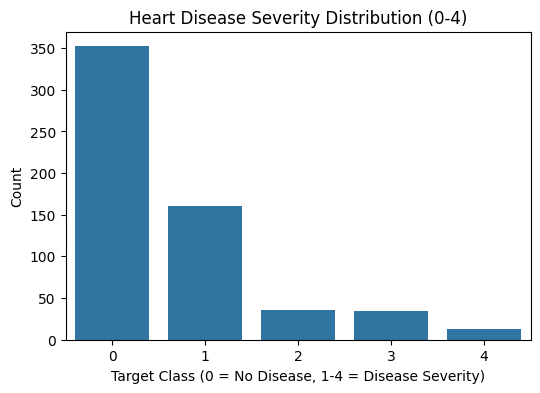

In [13]:
# Explore target variable distribution
# Target classes: 0 = no disease, 1-4 = increasing severity of heart disease
print("\nTarget value counts:\n", df['target'].value_counts())

# Percentage distribution
print("\nTarget value percentages:\n", df['target'].value_counts(normalize=True))

# Visualize target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Severity Distribution (0-4)")
plt.xlabel("Target Class (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Count")
plt.show()


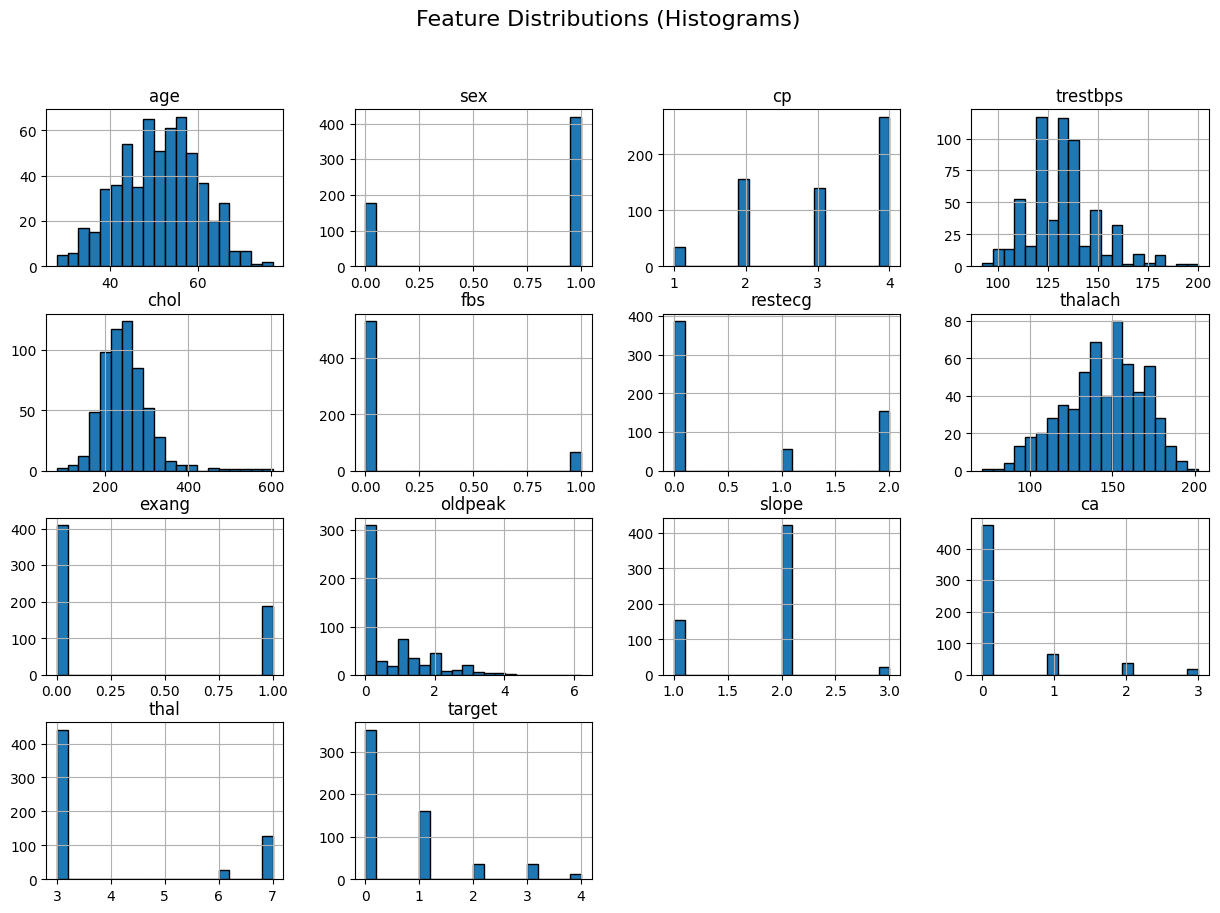

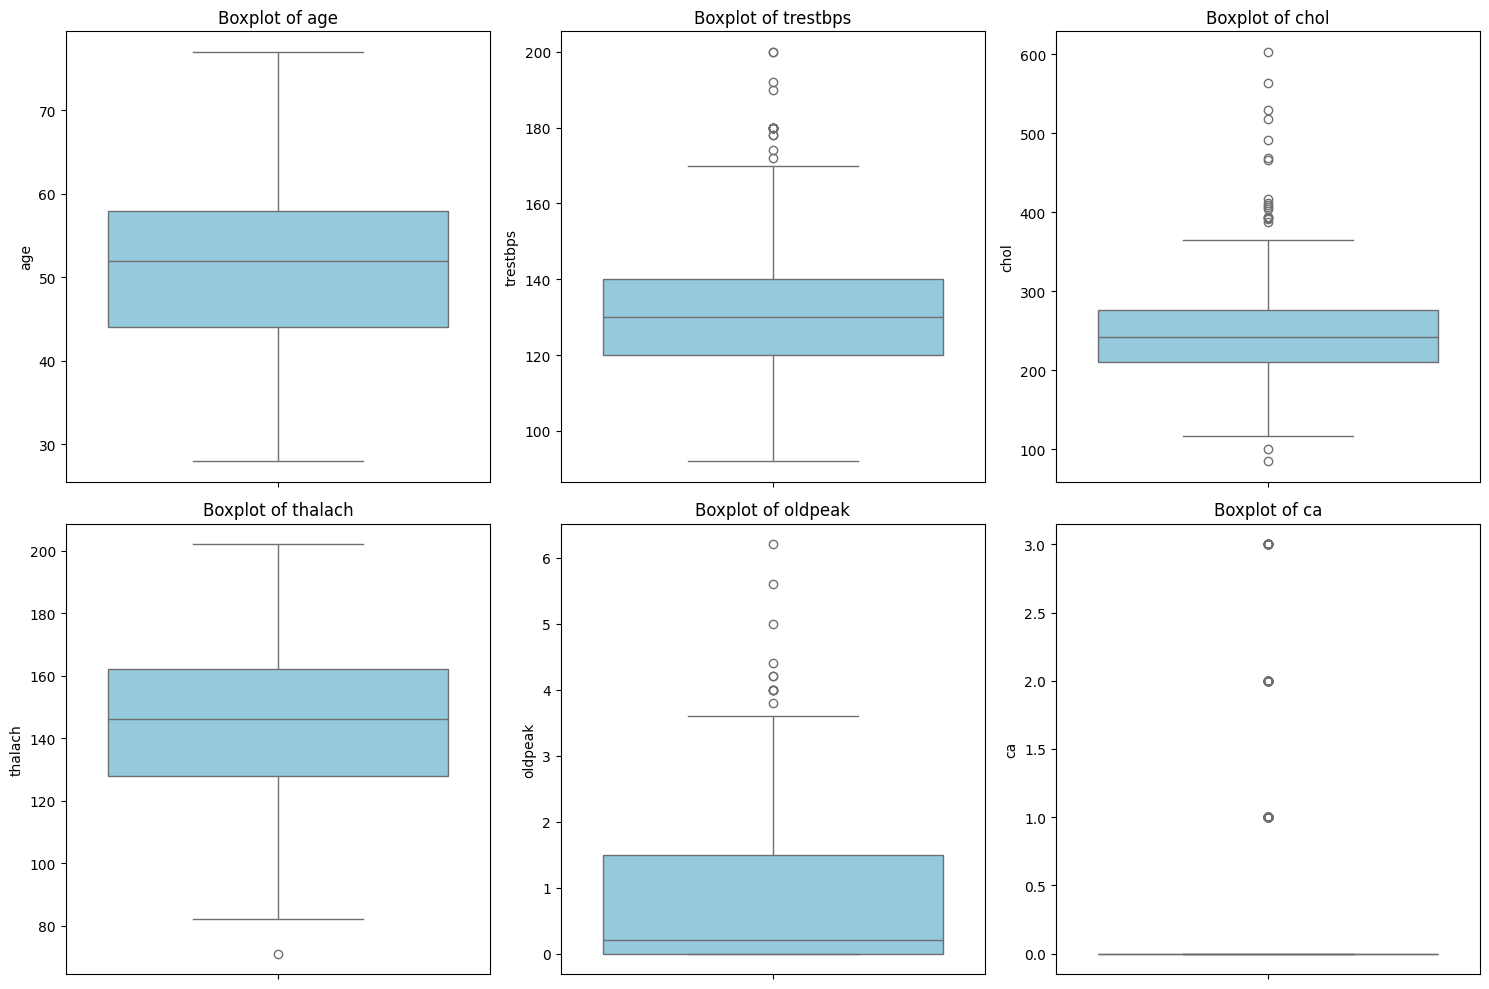

In [14]:
# Visualize numeric feature distributions

# --------------------------
# Histograms
# --------------------------
# Histograms show the distribution of each numeric feature
# Useful for spotting skewness, multiple peaks, or unusual ranges
df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

# --------------------------
# Boxplots
# --------------------------
# Boxplots show median, quartiles, and outliers
# Useful for detecting extreme values in numeric features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Preprocessed shape: (597, 20)


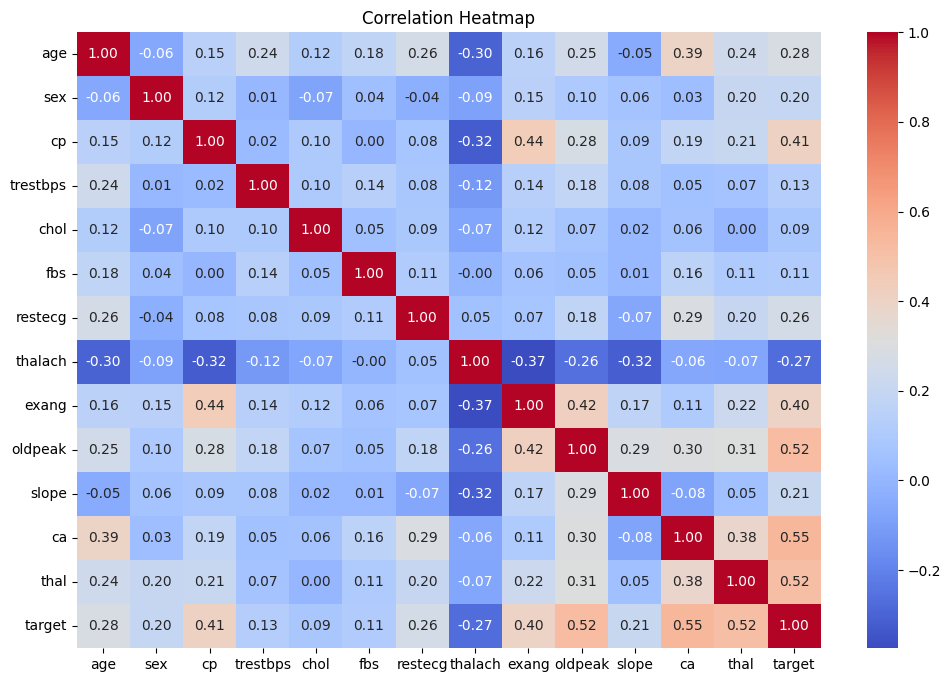

In [15]:
# Preprocessing for modeling

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Define numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_features = ["cp", "thal", "slope"]

# Preprocessing pipeline: scale numeric features, one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder="passthrough"  # keep other columns (if any) as-is
)

# Apply preprocessing
X_prep = preprocessor.fit_transform(X)
print("Preprocessed shape:", X_prep.shape)

# --------------------------
# Exploratory Data Analysis (EDA)
# --------------------------
# Correlation heatmap to check linear relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Recursive Feature Elimination (RFE) with Random Forest
# Purpose: Find the optimal number of features for modeling using cross-validation

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Base model for RFE
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Try different numbers of features from 5 up to total number of features
feature_range = range(5, X_prep.shape[1]+1)
cv_scores = []

for n in feature_range:
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_rfe = rfe.fit_transform(X_prep, y)
    
    # Evaluate the selected features using 5-fold cross-validation with F1 score
    scores = cross_val_score(model, X_rfe, y, cv=5, scoring='f1_macro')  
    cv_scores.append(scores.mean())

# Identify the best number of features
best_n = feature_range[np.argmax(cv_scores)]
print(f"Best number of features: {best_n} with CV F1 score: {max(cv_scores):.4f}")


Best number of features: 9 with CV F1 score: 0.3530


In [17]:
# Apply RFE with the best number of features from the step before
# Purpose: Reduce dimensionality and select the most important features for modeling

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# --- Initialize model for RFE ---
model = RandomForestClassifier(n_estimators=250, random_state=42)

# --- Choose number of features to select ---
n_features_to_select = 9

# --- Fit RFE on preprocessed features ---
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(X_prep, y)

# --- Get boolean mask of selected features ---
selected_mask = rfe.support_

# --- Map mask to actual feature names ---
# Categorical features after one-hot encoding
cat_features_ohe = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names (numeric + one-hot + passthrough columns)
all_feature_names = numeric_features + list(cat_features_ohe) + ['sex', 'fbs', 'exang', 'restecg']

# List of selected features
selected_features = [name for i, name in enumerate(all_feature_names) if selected_mask[i]]
print("Selected Features by RFE:")
print(selected_features)

# --- Create reduced dataset with only selected features ---
X_reduced = X_prep[:, selected_mask]
print("Shape of reduced dataset:", X_reduced.shape)


Selected Features by RFE:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_3.0', 'restecg']
Shape of reduced dataset: (597, 9)


In [18]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# -------------------------------
# Purpose: Create training and test sets with stratification
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# Step: Handle class imbalance with SMOTETomek
# Purpose: Balance minority and majority classes in the training set
# -------------------------------
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

print("Resampled training set shape:", X_res.shape)
print("Test set shape:", X_test.shape)


Resampled training set shape: (1387, 9)
Test set shape: (120, 9)
